### **1: Importing Necessary Libraries**
We will import Numpy, Pandas, Matplotlib, Seaborn, Statsmodels and sklearn library in python.

statsmodels: for statistical modeling for fitting logistic regression.
sklearn: Provides tools for machine learning modeling.

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

### **2.1 Loading and Handling Missing Values from the Dataset**
We will load the dataset and drop the irrelevant features from the the dataset like "education" and rename columns also.

disease_df.pd.read_csv(): This is used to read the contents of CSV file.
disease_df, dropna(axis=0, inplace=True): This removes any rows with missing values (NaN) from the DataFrame.
disease_df.TenYearCHD.value_counts(): This prints the count of unique values in the TenYearCHD column which likely indicates whether a patient has heart disease.

In [65]:
df=pd.read_csv("framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [66]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [68]:
df.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


### **3: Exploratory Data Analysis of Heart Disease Dataset**
In Exploratory Data Analysis (EDA) we perform EDA on the heart disease dataset to understand and gain insights into the dataset before building a predictive model for heart disease.

4.1: Ten Year's CHD Record of all the patients available in the dataset:
sns.countplot(x='TenYearCHD', data=disease_df, palettte="BuGn_r"): creates a count plot using Seaborn which visualizes the distribution of the values in the TenYearCHD column showing how many individuals have heart disease (1) vs. how many don’t (0).

In [69]:
df.drop(columns=['education'],inplace=True,axis=1)
df.dropna(inplace=True,axis=0)

In [70]:
df.isnull().sum().sum()

np.int64(0)

In [71]:
df["TenYearCHD"].value_counts()

,count
TenYearCHD,
0,3179
1,572


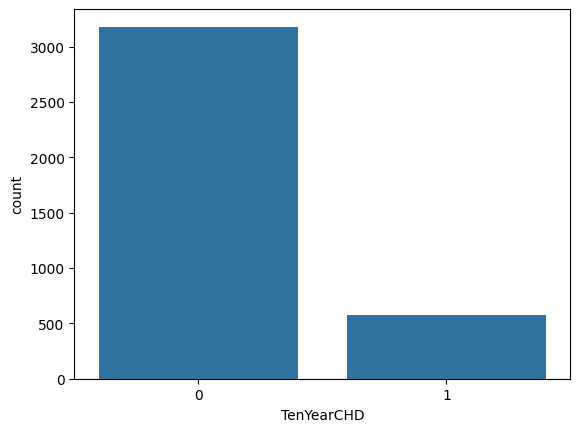

In [72]:
sns.countplot(x="TenYearCHD",data=df)
plt.show()

In [73]:
x=df.drop(columns=["TenYearCHD"])
y=df["TenYearCHD"]

### **4: Splitting the Dataset into Test and Train Sets**
We will split the dataset into training and testing portions. But before that we will transform our data by scaling all the features using StandardScaler.

X=preprocessing.StandardScaler().fit(X).transform(X): This scales the features in X to have a mean of 0 and standard deviation of 1 using StandardScaler. Scaling is important for many machine learning models, especially when the features have different units or magnitudes.
Training set (70% of data, X_train and y_train)
Test set (30% of data, X_test and y_test)
random_state=4 ensures the split is reproducible.

In [74]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 4)


### **5: Fitting Logistic Regression Model for Heart Disease Prediction**
We will create a simple logistic regression model for prediction.

logreg=LogisticRegression(): This creates an instance of the LogisticRegression model.
logreg.fit(X_train, y_train): This trains the logistic regression model using the training data (X_train for features and y_train for the target).
y_pred=logreg.predict(X_test): This uses the trained logistic regression model to make predictions on the test set (X_test). The predicted values are stored in y_pred.

In [76]:

model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =', accuracy_score(y_test, y_pred))

Accuracy of the model is = 0.8525754884547069


In [78]:
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))


The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       951
           1       0.70      0.09      0.16       175

    accuracy                           0.85      1126
   macro avg       0.78      0.54      0.54      1126
weighted avg       0.83      0.85      0.80      1126



In [79]:
cm=confusion_matrix(y_test, y_pred)
con_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
print(con_metrix)


          Predicted:0  Predicted:1
Actual:0          944            7
Actual:1          159           16


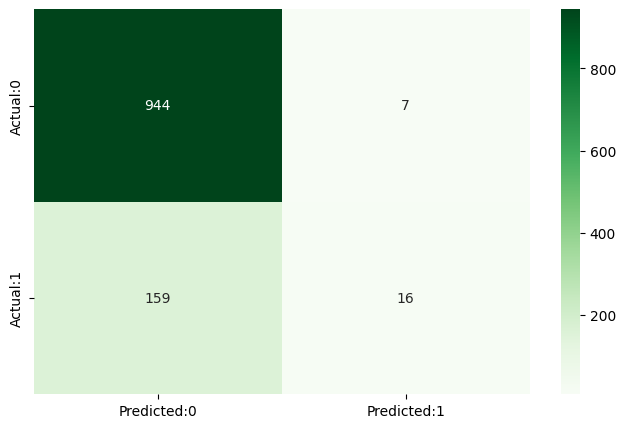

In [80]:
plt.figure(figsize = (8, 5))
sns.heatmap(con_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()